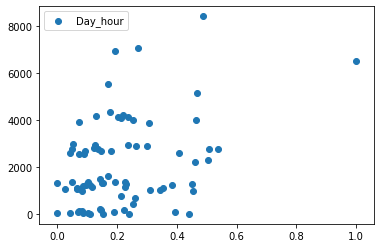

In [71]:
#import time-series from .csv file
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import time
import numpy as np
from sklearn.model_selection  import GridSearchCV
from sklearn import preprocessing
df1 = pd.read_csv("/home/just/Scaricati/export.csv" )     #leggo i dati
y = df1[['Next charge (minuti)']]
X = df1[['Energia assorbita (Wh)','Day_hour','Day_week','Durata ricarica (minuti)']]
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))    #effettuo lo scaling dei dati
X_scaled = X_std * (1) + 0
y_std = (y - y.min(axis=0)) / (y.max(axis=0) - y.min(axis=0))
y_scaled = y_std * (1) + 0

In [68]:
#split data into train and set with ratio of 70%/30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_scaled ,test_size=0.3, random_state=0,shuffle = False)

In [100]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
svr_rbf = SVR(kernel='rbf',gamma = 0.005, C = 10000, epsilon = 0.08) 
grid_param = [{'C': [10000, 100000], 'gamma': [0.001, 0.005], 'kernel': ['rbf'], 'epsilon': [0.1,0.03,0.09,1,0.08] }]
gd_sr = GridSearchCV(estimator=svr_rbf,            #cerco i parametri migliori per l'algoritmo SVR
                     param_grid=grid_param,
                     cv = 3,
                     n_jobs=-1,
                     iid = False)
gd_sr.fit(X_train, y_train.values.ravel())
y_pred = svr_rbf.fit(X_train, y_train.values.ravel()).predict(X_test)     #effettuo la prediione dei risultati
best_parameters = gd_sr.best_params_
print(best_parameters)

{'C': 10000, 'epsilon': 0.1, 'gamma': 0.005, 'kernel': 'rbf'}


Mean Absolute Error: 0.2311985876181668
Mean Squared Error: 0.08112546915222296
Root Mean Squared Error: 0.28482533095253826
R2: -3.406097925124313


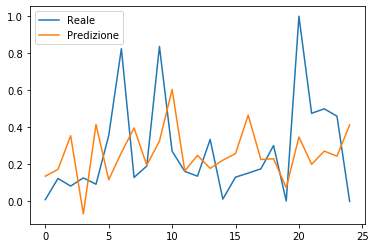

In [102]:
#evaluate results
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2:',r2_score(y_pred,y_test))
ascisse1 = []
ascisse2 = []
for i in (range(0,len(y_test))):
          ascisse1.append(i)
for i in (range(0,len(y_train))):
          ascisse2.append(i)
plt.figure(1)
plt.plot(ascisse1,y_test ,label = 'Reale')
plt.plot(ascisse1,y_pred,label = 'Predizione')
plt.legend(loc = 'upper left')
plt.show()